# Phishing Website Classification 
## Packages

In [28]:
#Import all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want out plots to appear inside the notebook
%matplotlib inline 

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn import svm
pd.pandas.set_option('display.max_columns',None)


## Loading Dataset

In [2]:
#reading dataset
df=pd.read_csv("dataset_small.csv")

In [3]:
print("Shape of Dataset :",str(df.shape))

Shape of Dataset : (58645, 112)


## Exploratory Data Analysis(EDA)

In [4]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,0.022338,-0.033814,-0.210947,1.590383,-0.298525,-0.287049,-0.293409,-0.291704,-0.296070,-0.297331,-0.293733,-0.297451,-0.296905,-0.292932,-0.298525,-0.296547,-0.219200,16.923932,-0.045750,-0.211084,-0.260466,-0.298525,-0.298525,-0.296035,-0.298082,-0.296377,-0.296956,-0.297877,-0.298082,-0.297672,-0.297366,-0.296752,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.83

In [5]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


In [6]:
df["phishing"].value_counts()

1    30647
0    27998
Name: phishing, dtype: int64

<AxesSubplot:xlabel='Phishing', ylabel='Counts'>

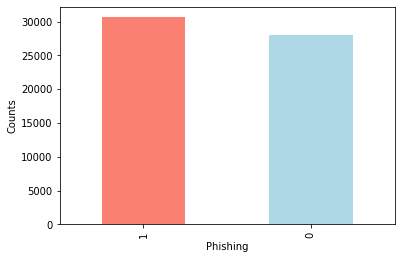

In [7]:
df["phishing"].value_counts().plot(kind='bar',color=["salmon","lightblue"],xlabel='Phishing',ylabel='Counts')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


In [9]:
#Checking is theire any missing value
df.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

## Phishing Frequency according to number of dots in the URL

In [10]:
df.qty_dot_url.value_counts()

2     29615
1     12949
3     10351
4      3426
5       999
6       452
7       217
14      135
8       120
15       86
9        64
10       48
16       44
13       37
12       33
11       32
17       22
18        6
22        3
20        3
24        1
23        1
19        1
Name: qty_dot_url, dtype: int64

In [11]:
pd.crosstab(df.qty_dot_url,df.phishing)

phishing,0,1
qty_dot_url,,
1,5429,7520
2,17054,12561
3,3914,6437
4,1442,1984
5,136,863
6,11,441
7,7,210
8,1,119
9,2,62


In [12]:
df.qty_comma_file.value_counts()

 0    41115
-1    17507
 3       11
 1       10
 5        1
 2        1
Name: qty_comma_file, dtype: int64

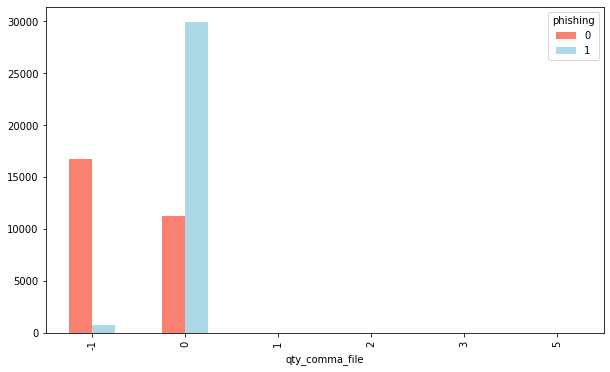

In [13]:
pd.crosstab(df.qty_comma_file,df.phishing).plot(kind='bar',figsize=(10,6),color=["salmon","lightblue"])
plt.show()


In [14]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


## Feature selection

In [15]:
X=df.drop("phishing",axis=1)
Y=df["phishing"]

In [16]:
##spliting data into train and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
#Co-realtion between all the data
df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.097781,0.119611,0.230117,0.416628,0.503372,0.168633,0.559617,0.001702,-0.001502,0.025278,0.040335,0.019168,-0.003099,0.000947,0.010218,0.054215,0.412330,0.454406,0.461456,0.035055,0.001851,NaN,NaN,NaN,0.002006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152756,0.280986,0.058988,0.019740,0.439393,0.084980,0.109958,0.192022,0.119991,0.119075,0.101395,0.112170,0.115993,0.117034,0.121421,0.120067,0.117419,0.092458,0.119991,0.114883,0.034732,0.191533,0.326665,0.076674,0.100727,0.119991,0.119991,0.119921,0.120223,0.124972,0.117500,0.117910,0.119583,0.119877,0.118038,0.101125,0.119991,0.119991,0.028961,0.099552,0.724009,0.236077,0.240869,0.301098,0.452800,0.492980,0.410917,0.581193,0.358565,0.360588,0.361545,0.355627,0.351349,0.360745,0.361316,0.361945,0.174251,0.399878,0.422435,0.415295,0.335803,0.011160,-0.006057,0.004815,-0.024738,-0.058713,-0.049259,-0.030655,-0.045841,0.051002,-0.066587,-0.049028,-0.006565,-0.004649,-0.066927,0.140542
qty_hyphen_url,0.097781,1.000000,0.201111,0.266752,0.053262,0.156433,0.033867,0.114237,0.014788,0.016942,0.003615,0.024982,0.008320,0.000866,0.002927,0.011963,0.025620,0.119656,0.381573,-0.003478,0.358532,-0.004996,NaN,NaN,NaN,-0.001409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101359,0.136928,-0.013263,0.040439,0.171172,0.768662,0.170178,0.251371,0.173437,0.176625,0.150057,0.155611,0.171140,0.172203,0.169040,0.173534,0.169027,0.135337,0.173437,0.166538,0.041621,0.371130,0.170453,0.535636,0.160108,0.173437,0.173437,0.175041,0.173440,0.176640,0.173113,0.172882,0.172993,0.172849,0.169848,0.148283,0.173437,0.173437,0.044456,0.262384,0.092676,0.450560,0.210792,0.147121,0.142662,0.160213,0.132381,0.135751,0.144500,0.145013,0.144172,0.142555,0.139841,0.144659,0.143799,0.146687,0.080091,0.219355,0.143558,0.175310,0.056637,-0.003784,0.005196,-0.006949,-0.055222,0.003269,0.049440,0.029647,-0.009515,-0.021906,0.019281,0.015099,-0.002805,0.011985,-0.019403,0.140790
qty_underline_url,0.119611,0.201111,1.000000,0.216192,0.060388,0.322340,0.050482,0.246420,0.059878,-0.002003,0.037431,0.028035,0.025376,0.013827,0.006814,

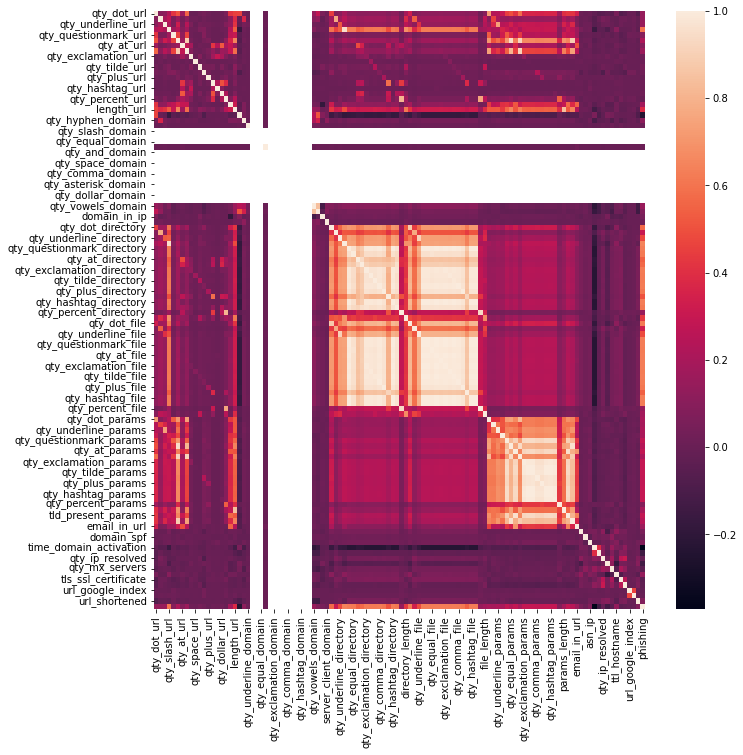

In [18]:
##ploting Co-realtion between all the data
corr_matrix=df.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
ax=sns.heatmap(corr_matrix)

In [19]:
##With the following fucntion we can select highly correlated features
##it will remove the first feature that is correlated with anything other feature
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
corr_feature=correlation(X_train,0.7)
len(corr_feature)

51

In [21]:
corr_feature

{'domain_length',
 'params_length',
 'qty_and_directory',
 'qty_and_file',
 'qty_and_params',
 'qty_and_url',
 'qty_asterisk_directory',
 'qty_asterisk_file',
 'qty_asterisk_params',
 'qty_at_directory',
 'qty_at_file',
 'qty_at_params',
 'qty_comma_directory',
 'qty_comma_file',
 'qty_comma_params',
 'qty_dollar_directory',
 'qty_dollar_file',
 'qty_dollar_params',
 'qty_dot_file',
 'qty_dot_params',
 'qty_equal_directory',
 'qty_equal_file',
 'qty_equal_params',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_exclamation_params',
 'qty_hashtag_directory',
 'qty_hashtag_file',
 'qty_hashtag_params',
 'qty_hyphen_directory',
 'qty_hyphen_file',
 'qty_params',
 'qty_percent_directory',
 'qty_percent_file',
 'qty_plus_directory',
 'qty_plus_file',
 'qty_plus_params',
 'qty_questionmark_directory',
 'qty_questionmark_file',
 'qty_questionmark_params',
 'qty_slash_directory',
 'qty_slash_file',
 'qty_space_directory',
 'qty_space_file',
 'qty_space_params',
 'qty_tilde_directo

In [22]:
X_train=X_train.drop(corr_feature,axis=1)
X_test=X_test.drop(corr_feature,axis=1)

In [23]:
X_train.shape

(46916, 60)

## MeanNoramlization

In [24]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train=pd.DataFrame(norm.transform(X_train),columns=X_train.columns)

# transform testing dataabs
X_test=pd.DataFrame(norm.transform(X_test),columns=X_test.columns)

In [25]:
X_train.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_in_ip,server_client_domain,qty_dot_directory,qty_underline_directory,directory_length,file_length,qty_hyphen_params,qty_slash_params,qty_percent_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,0.043478,0.0,0.000000,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.002884,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,0.05,0.055556,0.001554,0.000811,0.0,0.0,0.0,0.0,0.077508,0.0,0.000000,0.000000,0.000000,0.12,0.125,0.00,0.003426,0.0,0.230769,0.5,0.5,0.0
1,0.086957,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.005528,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.5,0.038332,0.000000,0.000000,0.08,0.250,0.00,0.003472,0.0,0.000000,0.5,0.5,0.0
2,0.043478,0.0,0.000000,0.068182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.007450,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098361,0.0,0.0,0.05,0.055556,0.015540,0.000811,0.0,0.0,0.0,0.0,0.063529,0.5,0.038332,0.000000,0.000000,0.08,0.250,0.25,0.000127,1.0,0.076923,0.5,0.5,0.0
3,0.043478,0.0,0.047619,0.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.019707,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.0,0.0,0.10,0.111111,0.052059,0.017032,0.0,0.0,0.0,0.0,0.059444,1.0,0.066953,0.127180,0.003810,0.08,0.125,0.05,0.030717,0.0,0.076923,0.5,0.5,0.0
4,0.000000,0.0,0.000000,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.002163,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032787,0.0,0.0,0.05,0.055556,0.006216,0.005677,0.0,0.0,0.0,0.0,0.054391,0.0,0.038332,0.394644,0.005449,0.08,0.250,0.00,0.000625,1.0,0.230769,0.5,0.5,1.0


In [26]:
max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [29]:
#Put model in Dictionary
models={"LogisticRegression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "RandomForest":RandomForestClassifier(),
        "XGBClassifier":XGBClassifier(),
        "GaussianNB":GaussianNB(),
        "svm":svm.SVC(kernel='linear'),
        "DecisionTreeClassifier":DecisionTreeClassifier(random_state=best_x)
        }

#create a fucntion to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    #Fits and evaluates given machine learning models.
    
    np.random.seed(42)
    
    #make a Dicty to store model score
    
    model_score={}
    
    for name , model in models.items():
        #Fit the model to the data
        model.fit(x_train , y_train)
        
        #Evaluate the model name and append its score to model_scores
        model_score[name]=model.score(x_test,y_test)
    return model_score

In [31]:
model_score=fit_and_score(models,X_train,X_test,Y_train,Y_test)
model_score()

/home/ganesh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ganesh/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


TypeError: 'dict' object is not callable

Logistic Regression (Scikit-learn)
Naive Bayes (Scikit-learn)
Support Vector Machine (Linear) (Scikit-learn)
K-Nearest Neighbours (Scikit-learn)
Decision Tree (Scikit-learn)
Random Forest (Scikit-learn)
XGBoost (Scikit-learn)
Artificial Neural Network with 1 Hidden layer (Keras)

In [32]:
model_compare=pd.DataFrame(model_score,index=["Accuracy"])
model_compare.head()

,LogisticRegression,KNN,RandomForest,XGBClassifier,GaussianNB,svm,DecisionTreeClassifier
Accuracy,0.892489,0.925058,0.957967,0.956603,0.600818,0.886521,0.93563


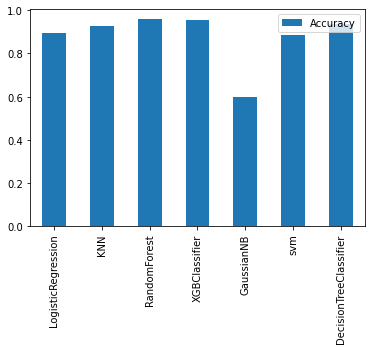

In [33]:
model_compare.T.plot.bar();

## HyperParameter Tuning

In [37]:
train_score=[]
test_score=[]
neighbors=range(1,21,1)

knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    
    train_score.append(knn.score(X_train,Y_train))
    
    test_score.append(knn.score(X_test,Y_test))

In [38]:
train_score

[0.9999147412396624,
 0.9616548725381533,
 0.9588839628271805,
 0.9479708415039645,
 0.946052519396368,
 0.9386776366271634,
 0.9386350072469947,
 0.9343933839201978,
 0.9321127120811663,
 0.9300878165231478,
 0.92821212379572,
 0.9265922073493051,
 0.9245246824111177,
 0.9235655213573195,
 0.9226916190638588,
 0.9220308636712422,
 0.9207946116463467,
 0.9193665274106915,
 0.9188336601585813,
 0.9172137437121665]

In [39]:
test_score

[0.9253133259442408,
 0.9164464148691278,
 0.9242049620598517,
 0.9226703043737744,
 0.925057549663228,
 0.9207946116463467,
 0.9231818569358001,
 0.9201125415636456,
 0.9185778838775684,
 0.9182368488362179,
 0.9174695199931793,
 0.9156790860260892,
 0.9144854633813624,
 0.9144002046210248,
 0.9122687356125841,
 0.9117571830505584,
 0.9114161480092079,
 0.9109898542075199,
 0.9103077841248188,
 0.9106488191661694]

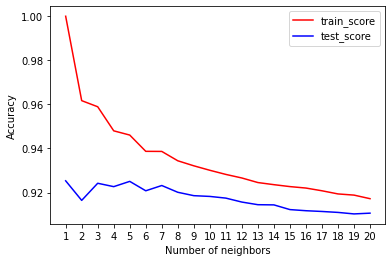

Maximun accuracy achieved is  92.53133259442407


In [40]:
plt.plot(neighbors,train_score,c="r")
plt.plot(neighbors,test_score,c="b")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.legend(["train_score","test_score"])
plt.show()

print("Maximun accuracy achieved is ",max(test_score)*100)

## Hyperparameter tuning with the RandomizedSearchCV
We're going to tune:

* RandomForestClassifier()
 
... using RandomizedSearchCV

In [41]:
np.random.seed(42)
##create a hyperparameter grid for RandomForestClassifier 
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
               
                         n_iter=20,
                        verbose=True)

In [43]:
rs_rf.fit(X_train,Y_train)
rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [45]:
rs_rf.score(X_test,Y_test)

0.9530224230539688